Tutorials table of content:

- [Tutorial 1: Run a first scenario](./Tutorial-1_Run_your_first_scenario.ipynb)
- Tutorial 2: Add contributivity measurements methods
- [Tutorial 3: Use a custom dataset](./Tutorial-3_Use_homemade_dataset.ipynb)


# Tutorial 2 : Exploring contributivity 

With this example, we dive deeper into the potential of the library, and the notion of contributivity.

## 1 - Prerequisites

In order to run this example, you'll need to:

* use python 3.7 +
* install this package https://pypi.org/project/mplc/

If you did not follow our first tutorial, it is recommended to [take a look at it !](https://github.com/SubstraFoundation/distributed-learning-contributivity/blob/master/notebooks/examples/1%20_INTRO_MNIST.ipynb) 


In [1]:
!pip install mplc

     |████████████████████████████████| 184kB 8.3MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
  Created wheel for librosa: filename=librosa-0.8.0-cp36-none-any.whl size=201376 sha256=8f4aa6eb1bd3bea8bcff8f15745686943b29715612f17de8d0dc17593e1d4194
  Stored in directory: /root/.cache/pip/wheels/ee/10/1e/382bb4369e189938d5c02e06d10c651817da8d485bfd1647c9
Successfully built librosa
  Found existing installation: librosa 0.6.3
    Uninstalling librosa-0.6.3:
      Successfully uninstalled librosa-0.6.3
     |████████████████████████████████| 378kB 9.3MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 13.1MB 240kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2

     |████████████████████████████████| 14.6MB 211kB/s 
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


     |████████████████████████████████| 7.1MB 8.8MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 225kB 9.5MB/s 
  Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1
     |████████████████████████████████| 61kB 4.6MB/s 
     |████████████████████████████████| 102kB 5.6MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=64d75b5476a68babd01f8df2f968984448bab5004fe4ded35569fc03471f1f03
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars
     |████████████████████████████████| 516.2MB 31kB/s 
     |████████████████████████████████| 460kB 50.5MB/s 
     |████████████████████████████████| 3.0MB 44.9MB/s 
  Found existing installation: ten

## 2 - Context 

In collaborative data science projects partners sometimes need to train a model on multiple datasets, contributed by different data providing partners. In such cases the partners might have to measure how much each dataset involved contributed to the performance of the model. This is useful for example as a basis to agree on how to share the reward of the ML challenge or the future revenues derived from the predictive model, or to detect possible corrupted datasets or partners not playing by the rules. The library explores this question and the opportunity to implement some mechanisms helping partners in such scenarios to measure each dataset's *contributivity* (as *contribution to the performance of the model*).

In the [first tutorial](./Tutorial-1_Run_your_first_scenario.ipynb), you learned how to parametrize and run a scenario.
In this tutorial, you will learn how to add one of the contributivity measurement implemented to your scenario run.  

In [2]:
# imports
import pandas as pd
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2 -  Setup and run the scenario

We will use the same dataset, and overall setup for the scenario. The main change relies on the contributivity parameter, which is a list of the contributivity methods that will be tested. As these methods are time-consuming, the parameter is set empty. 

All methods available are:

```python
- "Shapley values"
- "Independent scores"
- "TMCS"
- "ITMCS"
- "IS_lin_S"
- "IS_reg_S"
- "AIS_Kriging_S"
- "SMCS"
- "WR_SMC"
```

See in the documentation the [dedicated section](https://github.com/SubstraFoundation/distributed-learning-contributivity/blob/master/subtest/docs/documentation.md#contributivity-measurement-approaches-studied-and-implemented) for explanation of the different methods.  

Here we will use the Shapley value, a contributivity measurement which came from cooperative game theory.

In [3]:
from mplc.scenario import Scenario

my_scenario = Scenario(partners_count=3,
                            amounts_per_partner=[0.001, 0.699, 0.3],
                            epoch_count=10,
                            minibatch_count=3,
                            dataset='mnist',
                            methods=["Shapley values"])  # <- Here is the difference

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
2020-09-22 07:02:56.095 | INFO     | mplc.utils:init_gpu_config:136 - Found GPU: /physical_device:GPU:0


11493376/11490434 [==============================] - 1s 0us/step
2020-09-22 07:02:57.866 | INFO     | mplc.scenario:__init__:299 - ### Description of data scenario configured:
2020-09-22 07:02:57.866 | INFO     | mplc.scenario:__init__:300 -    Number of partners defined: 3
2020-09-22 07:02:57.868 | INFO     | mplc.scenario:__init__:301 -    Data distribution scenario chosen: random
2020-09-22 07:02:57.869 | INFO     | mplc.scenario:__init__:302 -    Multi-partner learning approach: fedavg
2020-09-22 07:02:57.869 | INFO     | mplc.scenario:__init__:303 -    Weighting option: uniform
2020-09-22 07:02:57.869 | INFO     | mplc.scenario:__init__:304 -    Iterations parameters: 10 epochs > 3 mini-batches > 8 gradient updates per pass
2020-09-22 07:02:57.870 | INFO     | mplc.scenario:__init__:310 - ### Data loaded: mnist
2020-09-22 07:02:57.870 | INFO     | mplc.scenario:__init__:311 -    54000 train data with 54000 labels
2020-09-22 07:02:57.870 | INFO     | mplc.scenario:__init__:312 -   

In [4]:
my_scenario.run()

2020-09-22 07:03:05.810 | INFO     | mplc.scenario:split_data:548 - ### Splitting data among partners:
2020-09-22 07:03:05.810 | INFO     | mplc.scenario:split_data:549 -    Simple split performed.
2020-09-22 07:03:05.810 | INFO     | mplc.scenario:split_data:550 -    Nb of samples split amongst partners: 43738
2020-09-22 07:03:05.811 | INFO     | mplc.scenario:split_data:552 -    Partner #0: 43 samples with labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-09-22 07:03:05.811 | INFO     | mplc.scenario:split_data:552 -    Partner #1: 30573 samples with labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-09-22 07:03:05.811 | INFO     | mplc.scenario:split_data:552 -    Partner #2: 13122 samples with labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-09-22 07:03:20.830 | INFO     | mplc.multi_partner_learning:compute_test_score:136 - ## Training and evaluating model on partners with ids: ['#0', '#1', '#2']
2020-09-22 07:03:20.877 | INFO     | mplc.multi_partner_learning:compute_collaborative_round_fedavg:301 - 

0

2020-09-22 07:36:39.457 | INFO     | mplc.multi_partner_learning:compute_test_score:218 - Training and evaluation on multiple partners: done.
2020-09-22 07:36:39.460 | INFO     | mplc.scenario:run:704 - ## Evaluating contributivity with Shapley values: 
Shapley
Computation time: 0:25:25.791579
Number of characteristic function computed: 7
Contributivity scores: [0.20238334 0.38973331 0.38658333]
Std of the contributivity scores: [0. 0. 0.]
Normalized contributivity scores: [0.20678793 0.39821531 0.39499677]



## 3 - Accuracy score between each partner and comparison with aggregated model performance

Like in the first tutorial, we take a look at the scores, local and global.

In [5]:
history_df = my_scenario.mpl.history.partners_to_dataframe()
accuracy_df = history_df[history_df.Minibatch==2].pivot(index='Epoch', columns='Model', values='val_acc')
score_mpl_model = my_scenario.mpl.history.history['mpl_model']['val_accuracy'][:,-1]
accuracy_df['collective model'] = score_mpl_model
accuracy_df

,partner 0,partner 1,partner 2,collective model
0,0.344889,0.815500,0.800389,0.513000
1,0.658889,0.923333,0.909667,0.867167
2,0.682722,0.951444,0.946667,0.923542
3,0.878556,0.965444,0.960111,0.954667
4,0.925000,0.970722,0.970000,0.968000
5,0.856111,0.976444,0.974722,0.975250
6,0.862944,0.981056,0.976000,0.977792
7,0.938778,0.979444,0.978167,0.980125
8,0.932000,0.981389,0.980556,0.981333
9,0.934444,0.984833,0.980833,0.981625


We can plot the evolution of the accuracy through the epochs. 

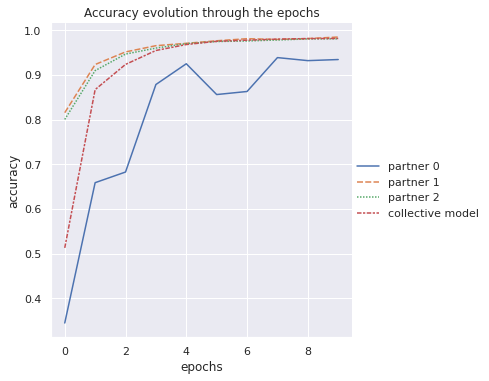

In [6]:
ax = sns.relplot(data = accuracy_df, kind="line")
ax.set(xlabel='epochs', ylabel='accuracy', title='Accuracy evolution through the epochs')

## 4 - Contributivity scores

We have set our scenario with Shapley values as a contributivity measurement method.

While being quite heavy on computing resources, it provides a great measuring tool. 



In [7]:
contributivity_score = my_scenario.contributivity_list

In [8]:
print(contributivity_score[0])


Shapley
Computation time: 0:25:25.791579
Number of characteristic function computed: 7
Contributivity scores: [0.20238334 0.38973331 0.38658333]
Std of the contributivity scores: [0. 0. 0.]
Normalized contributivity scores: [0.20678793 0.39821531 0.39499677]



Since we have artificially set our first partner to only have .1% of the total data set, it obviously contributes less in the final model. The poor accuracy of the local model of the first partner spotlights greatly this effect. However, as we use the MNIST dataset, even with .1% of the total data, the model is still able to perform reasonably well according to our Accuracy values

There is other way to artificially generate poor contributors. For instance, we can shuffle the labels of one partner, which will mislabel the whole dataset of this particular partner.  
To do so, we use the `corruption_parameters`of the scenario object. It must be a list, with size equal to the number of partner. For each partner , a string identifier indicates the method of corruption to apply on its dataset.

``` python
corrupted_partner=['random-uniform', 'not-corrupted', 'not-corrupted']

```
Here, with 3 partners, the first one will see its labels shuffled randomly, and the two others will have their dataset untouched.

More parameters (like the proportion of the data to be corrupted) can be used, but in that case the string identifiers will not be enough.
You will have to instantiate the corresponding corruption object before, and pass it to the scenario, instead of the string identifier.
``` python
from mplc.corruption import Permutation, Random$

partner0_corruption = Permutation(proportion=0.4)
partner1_corruption = Random(proportion=0.9)
corrupted_partner=[partner9_corruption, partner1_corruption, 'not-corrupted']

```
Here the first one will see its labels permuted, by a permutation matrix randomly generated (and accessible via partner.corruption.matrix). The second one will see its labels randomly changed, according to a Dirichlet distribution, which you can access to via partner.corruption.matrix attribute. Finally, the last partner will be its data untouched.
Please denote that the partner.corruption.matrix will be equal to identity matrix in that case.

In [11]:
my_second_scenario = Scenario(partners_count=3,
                        amounts_per_partner=[0.2, 0.5, 0.3],                             # <- The repartition is more regular
                        corruption_parameters = ['random-uniform', 'not-corrupted', 'not-corrupted'], # <- Here is the true difference
                        epoch_count=10,
                        minibatch_count=3,
                        dataset='mnist',
                        methods=["Shapley values"])  

my_second_scenario.run()

2020-09-22 08:17:17.569 | INFO     | mplc.scenario:__init__:299 - ### Description of data scenario configured:
2020-09-22 08:17:17.569 | INFO     | mplc.scenario:__init__:300 -    Number of partners defined: 3
2020-09-22 08:17:17.569 | INFO     | mplc.scenario:__init__:301 -    Data distribution scenario chosen: random
2020-09-22 08:17:17.569 | INFO     | mplc.scenario:__init__:302 -    Multi-partner learning approach: fedavg
2020-09-22 08:17:17.570 | INFO     | mplc.scenario:__init__:303 -    Weighting option: uniform
2020-09-22 08:17:17.570 | INFO     | mplc.scenario:__init__:304 -    Iterations parameters: 10 epochs > 3 mini-batches > 8 gradient updates per pass
2020-09-22 08:17:17.570 | INFO     | mplc.scenario:__init__:310 - ### Data loaded: mnist
2020-09-22 08:17:17.570 | INFO     | mplc.scenario:__init__:311 -    54000 train data with 54000 labels
2020-09-22 08:17:17.570 | INFO     | mplc.scenario:__init__:312 -    6000 val data with 6000 labels
2020-09-22 08:17:17.570 | INFO   

0

In [15]:
contributivity_score = my_second_scenario.contributivity_list
print(contributivity_score[0])


Shapley
Computation time: 0:04:43.211376
Number of characteristic function computed: 7
Contributivity scores: [0.03558331 0.47293334 0.47378333]
Std of the contributivity scores: [0. 0. 0.]
Normalized contributivity scores: [0.03622449 0.4814551  0.48232041]



In this case, one can denotes that the contributivity measure of the first partner is really low, and lower that in the previous case. We successfully detect a partner with corrupted labels, without any look at these data !

In the first case, if we thought about the repartition of a reward, or the money earned by the collaborative model, this Shapley value gives us a great idea of a fair repartition. It is important to denote that the Shapley value is not strongly related to the size of the dataset.  
In the second case, you were able to spotlight a corrupted dataset.It could be a partner who missed something in the preprocessing step ( human error, not a problem, but need to be detected !), or worth. Some partners could not play by the rules, and did not shared their precious data...

# That's it!

Now you can explore our other tutorials for a better overview of what can be done with `mplc`!

This work is collaborative, enthusiasts are welcome to comment open issues and PRs or open new ones.

Should you be interested in this open effort and would like to share any question, suggestion or input, you can use the following channels:

- This Github repository (issues or PRs)
- Substra Foundation's [Slack workspace](https://substra-workspace.slack.com/join/shared_invite/zt-cpyedcab-FHYgpy08efKJ2FCadE2yCA), channel `#workgroup-mpl-contributivity`
- Email: hello@substra.org

![logo Substra Foundation](../../img/substra_logo_couleur_rvb_w150px.png)